In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


**Importing the numpy, keras libraries for mathematical computational and building convolutional neural network respectively**

**Importing MNIST dataset**

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

**Load pre-shuffled MNIST data into train and test sets**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Printing the shape of the train dataset. It says that there are 60000 images of dimension 28X28X3**

(60000, 28, 28)


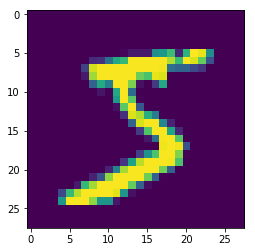

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshaping the RGB image to gray scale**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

**Normalizing the grey scale image, where 0 represents black and 255 represents white**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Printing the dependent varaible, which we are trying to predict**

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**Convert 1-dimensional class arrays to 10-dimensional class matrices**

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

**Printing the dependent after converting it into 10-dimensional**

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Building Convolutional network such that the parameters used are less than 20000. The global receptive field is maintained as the size of the image.**

In [10]:
from keras.layers import Activation, MaxPooling2D
model = Sequential() 
model.add(Convolution2D(18, 3, 3, activation='relu', input_shape=(28,28,1))) # I/P=28X28X1 | (3X3X1)X18 | O/P 26X26X18 | RF=3X3
model.add(Convolution2D(20, 3, 3, activation='relu'))# I/P= 26X26X18 | (3X3X18)X20 | O/P 24X24X20 | RF=5X5
model.add(MaxPooling2D(pool_size=(2, 2))) # I/P= 24X264X20 | MP (2X2) | O/P 12X12X20 | RF=10X10
model.add(Convolution2D(22,3,3, activation='relu')) # I/P= 12X12X20 | (3X3X20)X22 | O/P 10X10X22 | RF=12X12
model.add(MaxPooling2D(pool_size=(2, 2)))# I/P= 10X10X22 | MP (2X2) | O/P 5X5X22 | RF=24X24
model.add(Convolution2D(24, 3, 3, activation='relu')) # I/P= 5X5X22 | MP (3X3X22)X24 | O/P 3X3X24 | RF=26X26
model.add(Convolution2D(26, 3, 3, activation='relu')) # I/P= 3X3X24 | (3X3X24)X26 | O/P 1X1X26 | RF=28X28
model.add(Convolution2D(10, 1, 1)) # I/P= 1X1X26 |  (1X1X26)X10 | O/P 1X1X10 | RF=28X28
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

W0808 20:28:40.836252 139949210470272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
W0808 20:28:40.853154 139949210470272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 20:28:40.856440 139949210470272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/l

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 18)        180       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 20)        3260      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 22)        3982      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 22)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 24)          4776      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 26)          5642      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(26, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  # Remove the CWD from sys.path while we load stuff.


In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0808 20:28:40.995598 139949210470272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 20:28:41.028580 139949210470272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



**Training the model by setting the batch size and number of epochs**

In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0808 20:28:41.163440 139949210470272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0808 20:28:41.330441 139949210470272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/15
60000/60000 [==============================] - 19s 314us/step - loss: 0.2063 - acc: 0.9358
Epoch 2/15
60000/60000 [==============================] - 17s 286us/step - loss: 0.0624 - acc: 0.9803
Epoch 3/15
60000/60000 [==============================] - 17s 287us/step - loss: 0.0449 - acc: 0.9859
Epoch 4/15
60000/60000 [==============================] - 17s 286us/step - loss: 0.0364 - acc: 0.9885
Epoch 5/15
60000/60000 [==============================] - 17s 287us/step - loss: 0.0303 - acc: 0.9904
Epoch 6/15
60000/60000 [==============================] - 17s 287us/step - loss: 0.0250 - acc: 0.9923
Epoch 7/15
60000/60000 [==============================] - 17s 286us/step - loss: 0.0229 - acc: 0.9925
Epoch 8/15
60000/60000 [==============================] - 17s 286us/step - loss: 0.0205 - acc: 0.9933
Epoch 9/15
60000/60000 [==============================] - 17s 286us/step - loss: 0.0178 - acc: 0.9943
Epoch 10/15
60000/60000 [==============================] - 17s 287us/step - loss: 

**Evaluating the trained model on the dataset**

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03441090327793218, 0.992]


**Predicting the dependent variable**

In [14]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[1.25787835e-13 1.64624200e-11 2.94992901e-08 1.07517995e-09
  1.92160198e-13 4.27618661e-12 5.03588785e-20 1.00000000e+00
  1.13109296e-11 4.60883776e-10]
 [6.21893205e-12 1.02315134e-09 1.00000000e+00 2.16590483e-12
  8.40598885e-15 9.24402976e-19 4.65810288e-08 3.81807876e-17
  3.63922607e-11 3.71670473e-19]
 [2.79864361e-11 1.00000000e+00 2.68286615e-10 2.05496811e-08
  3.08067710e-10 3.05419441e-08 5.24451815e-10 2.15130136e-08
  3.48588075e-10 6.92541802e-10]
 [9.99999523e-01 2.93023954e-15 1.57705812e-13 3.77487147e-12
  8.41012576e-14 5.46493081e-13 4.31619185e-07 6.59994994e-14
  7.15888546e-12 5.10605933e-11]
 [1.06910063e-16 6.10567419e-09 1.21502844e-14 4.21682316e-17
  1.00000000e+00 6.63688642e-15 3.69089048e-12 7.14577486e-13
  1.16688855e-11 4.57853311e-09]
 [1.58790665e-13 1.00000000e+00 3.08447365e-11 8.41556755e-11
  6.19323981e-10 1.74225738e-11 1.11178005e-12 4.06654221e-09
  1.08271128e-10 8.27814553e-11]
 [3.93510704e-22 4.74044315e-09 2.04197345e-15 1.48433789e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

**Visualizing the features extracted at the end of every convolution**

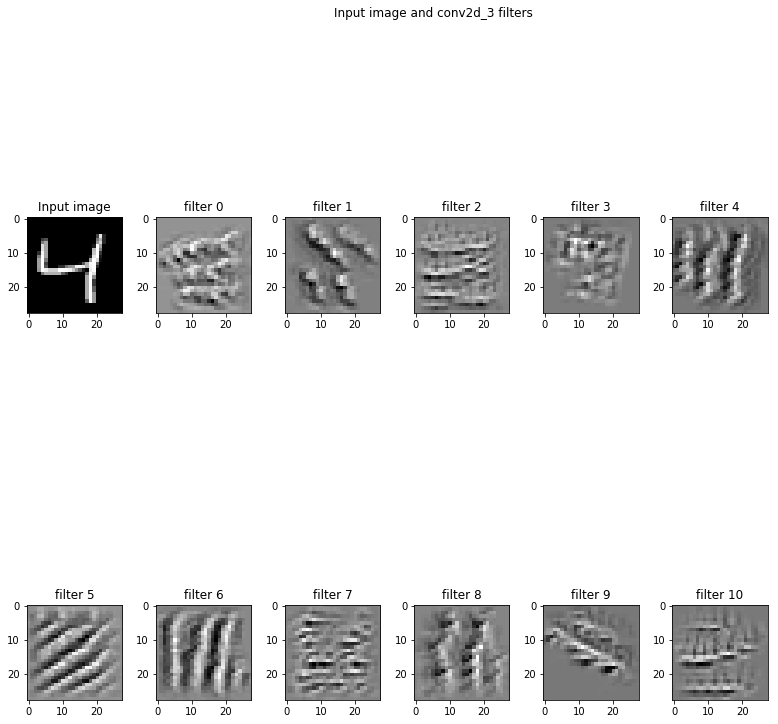

In [16]:
from matplotlib import pyplot as plt
from keras import backend as K
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Flatten, Dense, Activation
from keras.utils import np_utils
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()